# ***C/NC DNA Detecting Code***

---



> This code to detect the coding and noncoding sequances (4-kmers) using chaos game representation, Chaos game representation (CGR) is an iterative mapping technique that assigns each nucleotide in a DNA sequence to a respective position on the plane in a one-to-one manner. 

In [63]:
%matplotlib inline
import numpy as np
import os
import imageio
import matplotlib.pylab as plt
import math
import pandas as pd
from pathlib import Path
import matplotlib.cm as cm
import seaborn as sn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [64]:
#Retrieve_the_data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import time
start = time.time()

In [66]:
inp_out_needed=['data_coding_df1','data_noncoding_df1','data_coding_df1','data_noncoding_df1']
paths={'data_coding_df1':'/content/drive/My Drive/project/new_CGR_data/coding_seq','data_noncoding_df1':'/content/drive/My Drive/project/new_CGR_data/non_codingseq'}

In [ ]:
# df_image is a subfunction to create data frame from read each CGR image where each row is one image

In [67]:
def df_image(Images):
  Images1=sorted(Images) # sort them ascendingly 
  ImagF=np.zeros((len(Images),497664))  # All Images
  for i in range(len(Images1)):
      ImagF_1=imageio.imread(Images1[i])
      ImagF[i,:]=ImagF_1.reshape((1,497664))
  return pd.DataFrame(ImagF)

In [ ]:
# clas_assign is a subfunction to assign class 1 (one) to each coding cgr images data frame and class 0 (zero) to  noncoding cgr images data frame

In [68]:
def clas_assign(Images,c,b):
  c= df_image(Images)
  if b.split('_')[1] =='coding':
    c['y']=np.ones((len(c)))
  elif b.split('_')[1] =='noncoding':
    c['y']=np.zeros((len(c)))
  return c

In [ ]:
#A- For loop to make data frame from taking different types of images (coding & noncoding) from different folder (tain & test)  

In [69]:
for c in inp_out_needed:
  b=c
  home_path = os.getcwd()
  path=paths[c]
  os.chdir(path)
  Images=os.listdir()
  exec('{} = clas_assign(Images,c,b)'.format(c))

In [ ]:
# B- Merge codind & noncoding traing data (after assign class to each one ) in one train data frame and
# codind & noncoding testing data (after assign class to each one ) in one test data frame 

In [70]:
# merge coding sequence of train data to noncoding sequence of train data to obtain training sequence data frame
data_coding_noncoding1=pd.concat([data_coding_df1,data_noncoding_df1])

In [ ]:
# C - split train dataframe (from step B ) to X_train (data) & y_train (labeles) variables to can start machine learning classification

In [71]:
X=data_coding_noncoding1.iloc[:,:-1]
y=data_coding_noncoding1.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [72]:
df_resultcol=['NaiveBayes','logistic regression','KNN','Perceptron','SVM','Combination']
df_resultrow=['Accuracy','Specificity','Precision','Sensitivity']

In [73]:
df_result=pd.DataFrame(columns=df_resultcol,index=df_resultrow)
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,NaN,NaN,NaN,NaN,NaN,NaN
Specificity,NaN,NaN,NaN,NaN,NaN,NaN
Precision,NaN,NaN,NaN,NaN,NaN,NaN
Sensitivity,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# F- Statistical Data Analysis after Scalling:

 Apply different type of classification :

1- Naive Bayes Classifier (supervised linear classifier)

2- Logistic regression (supervised linear classifier)

3- k-nearst neighbor classifier ( supervised nonlinear classifier)

4- perceptron (supervised linear classifier)

5- SVM (Support Vector Machine ) (supervised classifier)



In [ ]:
#1- Naive Bayes Classifier

In [74]:
# E- feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [75]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model_n = GaussianNB()

# Train the model using the training sets
model_n.fit(X_train, y_train)

#Predict Output
y_pred_nai = model_n.predict(X_test) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_naiv=confusion_matrix(y_test,y_pred_nai)
cm_naiv

array([[28,  5],
       [ 3, 42]])

In [77]:
#Sensitivity_(True positive rate TPR) 
TP_nav= cm_naiv[0][0]
FN_nav= cm_naiv[1][0]
TPR_nav= TP_nav/(TP_nav+FN_nav) * 100
print("Sensitivity "+str(TPR_nav)+'%')

Sensitivity 90.32258064516128%


In [78]:
#Specificity(Total Negative Result TNR)
TN_nav= cm_naiv[1][1]
FP_nav= cm_naiv[0][1] 
TNR_nav = TN_nav/(TN_nav+FP_nav) * 100
print("Specificity "+str(TNR_nav)+'%')

Specificity 89.36170212765957%


In [79]:
percision_nav=(TP_nav/(TP_nav+FP_nav))*100
percision_nav

84.84848484848484

Text(0.5, 1.0, 'Confusion Matrix Naive Bayes')

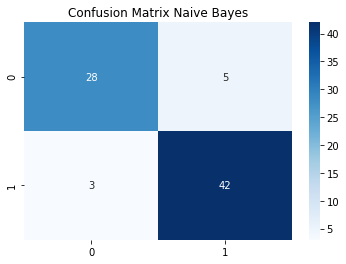

In [80]:
os.chdir(home_path)
cm_picture_nav=sn.heatmap(pd.DataFrame(cm_naiv),cmap="Blues", annot=True)
figure1 = cm_picture_nav.get_figure()   
plt.title("Confusion Matrix Naive Bayes")
figure1.savefig('/content/drive/My Drive/project/CGR_data/Confusion_NaiveBayes_4kmers.jpg', dpi=400)

In [81]:
#Calculate Accuracy and Print it
accu_navie=(sum([1 for i, j in zip(y_pred_nai, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_navie, "%")

Accuracy =  89.74358974358975 %


In [82]:
# calculating the cross validation for a set of predictions:
results_naiv = model_selection.cross_val_score(model_n, X_train, y_train,cv=None)*100
results_naiv

array([85.71428571, 93.65079365, 83.87096774, 85.48387097, 91.93548387])

In [83]:
acc_cross_validation=pd.DataFrame()
acc_cross_validation['NaiveBayes']=results_naiv

In [84]:
df_result['NaiveBayes']=pd.Series({'Accuracy':accu_navie,'Cross_Validation':results_naiv,'Confusion_Matrix':cm_naiv,'Sensitivity':TPR_nav,'Specificity':TNR_nav,'Precision':percision_nav})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,89.7436,NaN,NaN,NaN,NaN,NaN
Specificity,89.3617,NaN,NaN,NaN,NaN,NaN
Precision,84.8485,NaN,NaN,NaN,NaN,NaN
Sensitivity,90.3226,NaN,NaN,NaN,NaN,NaN


In [ ]:
#2- logistic regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

In [86]:
clf =linear_model.LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [87]:
y_pred_log1=clf.predict(X_test)

In [88]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_logistic=confusion_matrix(y_test,y_pred_log1)
cm_logistic

array([[32,  1],
       [ 2, 43]])

In [89]:
#Sensitivity_(True positive rate TPR) 
TP_log= cm_logistic[0][0]
FN_log= cm_logistic[1][0]
TPR_log= TP_log/(TP_log+FN_log) * 100
print("Sensitivity "+str(TPR_log)+'%')

Sensitivity 94.11764705882352%


In [90]:
#Specificity(Total Negative Result TNR)
TN_log= cm_logistic[1][1]
FP_log= cm_logistic[0][1] 
TNR_log = TN_log/(TN_log+FP_log) * 100
print("Specificity "+str(TNR_log)+'%')

Specificity 97.72727272727273%


In [91]:
percision_log=(TP_log/(TP_log+FP_log))*100
percision_log

96.96969696969697

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

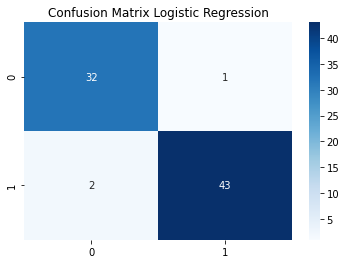

In [92]:
os.chdir(home_path)
cm_picture_logistic=sn.heatmap(pd.DataFrame(cm_logistic),cmap="Blues", annot=True)
figure2 = cm_picture_logistic.get_figure()   
plt.title("Confusion Matrix Logistic Regression")
figure2.savefig('/content/drive/My Drive/project/CGR_data/Confusion_Logistic_4kmers.jpg', dpi=400)

In [93]:
#Calculate Accuracy and Print it
accu_log=(sum([1 for i, j in zip(y_pred_log1, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_log, "%")

Accuracy =  96.15384615384616 %


In [94]:
# calculating the cross validation for a set of predictions:
results_log = model_selection.cross_val_score(clf, X_train, y_train,cv=None )*100
results_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([ 96.82539683, 100.        , 100.        ,  96.77419355,
        96.77419355])

In [95]:
acc_cross_validation['logistic regression']=results_log
acc_cross_validation

,NaiveBayes,logistic regression
0,85.714286,96.825397
1,93.650794,100.000000
2,83.870968,100.000000
3,85.483871,96.774194
4,91.935484,96.774194


In [96]:
df_result['logistic regression']=pd.Series({'Accuracy': accu_log,'Cross_Validation':results_log,'Confusion_Matrix':cm_logistic,'Sensitivity':TPR_log,'Specificity':TNR_log,'Precision':percision_log})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,89.7436,96.1538,NaN,NaN,NaN,NaN
Specificity,89.3617,97.7273,NaN,NaN,NaN,NaN
Precision,84.8485,96.9697,NaN,NaN,NaN,NaN
Sensitivity,90.3226,94.1176,NaN,NaN,NaN,NaN


In [ ]:
# 3- KNN:

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
neigh = KNeighborsClassifier(n_neighbors=25, metric= 'euclidean')
neigh.fit(X_train, y_train)

preds1 = neigh.predict(X_test)
preds1.shape


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

(78,)

In [98]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,preds1)
cm_knn

array([[33,  0],
       [16, 29]])

In [99]:
#Sensitivity_(True positive rate TPR) 
TP_knn= cm_knn[0][0]
FN_knn= cm_knn[1][0]
TPR_knn= TP_knn/(TP_knn+FN_knn) * 100
print("Sensitivity "+str(TPR_knn)+'%')

Sensitivity 67.3469387755102%


In [100]:
#Specificity(Total Negative Result TNR)
TN_knn= cm_knn[1][1]
FP_knn= cm_knn[0][1] 
TNR_knn = TN_knn/(TN_knn+FP_knn) * 100
print("Specificity "+str(TNR_knn)+'%')

Specificity 100.0%


In [101]:
percision_knn=(TP_knn/(TP_knn+FP_knn))*100
percision_knn

100.0

Text(0.5, 1.0, 'Confusion Matrix KNN')

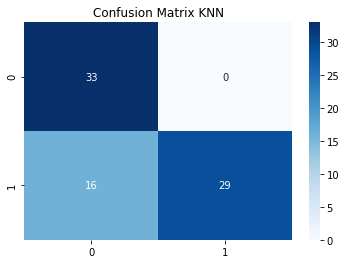

In [102]:
os.chdir(home_path)
cm_picture2=sn.heatmap(pd.DataFrame(cm_knn),cmap="Blues", annot=True)
figure3 = cm_picture2.get_figure()   
plt.title("Confusion Matrix KNN")
figure3.savefig('/content/drive/My Drive/project/CGR_data/Confusion_KNN_4kmers.jpg', dpi=400)

In [103]:
#Calculate Accuracy and Print it
accu_knn=(sum([1 for i, j in zip(preds1, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_knn, "%")

Accuracy =  79.48717948717949 %


In [104]:
# calculating the cross validation for a set of predictions:
results_knn= model_selection.cross_val_score(neigh, X_train, y_train,cv=None )*100
results_knn

array([66.66666667, 69.84126984, 70.96774194, 67.74193548, 74.19354839])

In [105]:
acc_cross_validation['KNN']=results_knn
acc_cross_validation

,NaiveBayes,logistic regression,KNN
0,85.714286,96.825397,66.666667
1,93.650794,100.000000,69.841270
2,83.870968,100.000000,70.967742
3,85.483871,96.774194,67.741935
4,91.935484,96.774194,74.193548


In [106]:
df_result['KNN']=pd.Series({'Accuracy':accu_knn,'Cross_Validation':results_knn,'Confusion_Matrix':cm_knn,'Sensitivity':TPR_knn,'Specificity':TNR_knn,'Precision':percision_knn})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,89.7436,96.1538,79.4872,NaN,NaN,NaN
Specificity,89.3617,97.7273,100,NaN,NaN,NaN
Precision,84.8485,96.9697,100,NaN,NaN,NaN
Sensitivity,90.3226,94.1176,67.3469,NaN,NaN,NaN


In [ ]:
# 4- Perceptron

In [107]:
from sklearn.linear_model import Perceptron
perp=Perceptron(max_iter=100, eta0=0.01,shuffle=True)
perp.fit(X_train, y_train)
Test_y=pd.Series(perp.predict(X_test), name='y')

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [108]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_per=confusion_matrix(y_test,Test_y)
cm_per

array([[32,  1],
       [ 0, 45]])

In [109]:
#Sensitivity_(True positive rate TPR) 
TP_per= cm_per[0][0]
FN_per= cm_per[1][0]
TPR_per= TP_per/(TP_per+FN_per) * 100
print("Sensitivity "+str(TPR_per)+'%')

Sensitivity 100.0%


In [110]:
#Specificity(Total Negative Result TNR)
TN_per= cm_per[1][1]
FP_per= cm_per[0][1] 
TNR_per = TN_per/(TN_per+FP_per) * 100
print("Specificity "+str(TNR_per)+'%')

Specificity 97.82608695652173%


In [111]:
percision_per=(TP_per/(TP_per+FP_per))*100
percision_per

96.96969696969697

Text(0.5, 1.0, 'Confusion Matrix Perceptron')

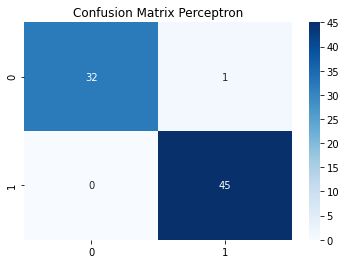

In [112]:
os.chdir(home_path)
cm_picture4=sn.heatmap(pd.DataFrame(cm_per),cmap="Blues", annot=True)
figure4 = cm_picture4.get_figure()   
plt.title("Confusion Matrix Perceptron")
figure4.savefig('/content/drive/My Drive/project/CGR_data/Confusion_Perceptron_4kmers.jpg', dpi=400)

In [113]:
#Calculate Accuracy and Print it
accu_per=(sum([1 for i, j in zip(Test_y, y_test) if i == j])/len(y_test))*100
print("Accuracy = " ,accu_per, "%")
acc_per2=((TP_per+TN_per)/(TP_per+FP_per+FN_per+TN_per))*100 # another way
acc_per2

Accuracy =  98.71794871794873 %


98.71794871794873

In [114]:
# calculating the cross validation for a set of predictions:
results_per = model_selection.cross_val_score(perp, X_train, y_train,cv=None)*100
results_per

array([ 96.82539683, 100.        , 100.        ,  98.38709677,
        96.77419355])

In [115]:
acc_cross_validation['Perceptron']=results_per
acc_cross_validation

,NaiveBayes,logistic regression,KNN,Perceptron
0,85.714286,96.825397,66.666667,96.825397
1,93.650794,100.000000,69.841270,100.000000
2,83.870968,100.000000,70.967742,100.000000
3,85.483871,96.774194,67.741935,98.387097
4,91.935484,96.774194,74.193548,96.774194


In [116]:
df_result['Perceptron']=pd.Series({'Accuracy':accu_per,'Cross_Validation':results_per,'Confusion_Matrix':cm_per,'Sensitivity':TPR_per,'Specificity':TNR_per,'Precision':percision_per})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,89.7436,96.1538,79.4872,98.7179,NaN,NaN
Specificity,89.3617,97.7273,100,97.8261,NaN,NaN
Precision,84.8485,96.9697,100,96.9697,NaN,NaN
Sensitivity,90.3226,94.1176,67.3469,100,NaN,NaN


In [ ]:
# 5- Support Vector Machine(SVM)

In [117]:
# Create Linear SVM object
from sklearn import svm
support = svm.LinearSVC(random_state=20)

In [118]:
# Train the model using the training sets and check score on test dataset
from sklearn.metrics import accuracy_score
support.fit(X_train, y_train)
predicted= support.predict(X_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
          verbose=0)

In [119]:
score_svm1=support.score(X_test, y_test) # method 1 to calculate accuracy of svm model
score_svm2=accuracy_score(y_test,predicted)  # method 2 to calculate accuracy of svm model
#Calculate Accuracy and Print it by method3
accu_svm=(sum([1 for i, j in zip(predicted, y_test) if i == j])/len(y_test))*100
print("Your Model Accuracy is", score_svm1*100,score_svm2*100,accu_svm)

Your Model Accuracy is 96.15384615384616 96.15384615384616 96.15384615384616


In [120]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(y_test,predicted)
cm_svm

array([[31,  2],
       [ 1, 44]])

In [121]:
#Sensitivity_(True positive rate TPR) 
TP_svm= cm_svm[0][0]
FN_svm= cm_svm[1][0]
TPR_svm= TP_svm/(TP_svm+FN_svm) * 100
print("Sensitivity "+str(TPR_svm)+'%')

Sensitivity 96.875%


In [122]:
#Specificity(Total Negative Result TNR)
TN_svm= cm_svm[1][1]
FP_svm= cm_svm[0][1] 
TNR_svm = TN_svm/(TN_svm+FP_svm) * 100
print("Specificity "+str(TNR_svm)+'%')

Specificity 95.65217391304348%


In [123]:
float32_epsilon = np.finfo(np.float32).eps
percision_svm_=(TP_svm/(TP_svm+FP_svm)+float32_epsilon)*100
percision_svm_

93.93940586032289

Text(0.5, 1.0, 'Confusion Matrix SVM')

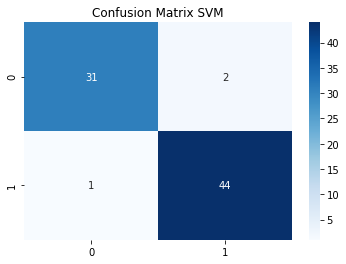

In [124]:
os.chdir(home_path)
cm_picture5=sn.heatmap(pd.DataFrame(cm_svm),cmap="Blues", annot=True)
figure5 = cm_picture5.get_figure()   
plt.title("Confusion Matrix SVM")
figure5.savefig('/content/drive/My Drive/project/CGR_data/Confusion_SVM_4kmers.jpg', dpi=400)

In [125]:
# calculating the mean R^2 for a set of predictions:
results_svm = model_selection.cross_val_score(support,X_train, y_train,cv=None)*100
results_svm

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([100.        , 100.        , 100.        ,  96.77419355,
        96.77419355])

In [126]:
acc_cross_validation['SVM']=results_svm
acc_cross_validation

,NaiveBayes,logistic regression,KNN,Perceptron,SVM
0,85.714286,96.825397,66.666667,96.825397,100.000000
1,93.650794,100.000000,69.841270,100.000000,100.000000
2,83.870968,100.000000,70.967742,100.000000,100.000000
3,85.483871,96.774194,67.741935,98.387097,96.774194
4,91.935484,96.774194,74.193548,96.774194,96.774194


In [127]:
df_result['SVM']=pd.Series({'Accuracy':accu_svm,'Cross_Validation':results_svm,'Confusion_Matrix':cm_svm,'Sensitivity':TPR_svm,'Specificity':TNR_svm,'Precision':percision_svm_})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,89.7436,96.1538,79.4872,98.7179,96.1538,NaN
Specificity,89.3617,97.7273,100,97.8261,95.6522,NaN
Precision,84.8485,96.9697,100,96.9697,93.9394,NaN
Sensitivity,90.3226,94.1176,67.3469,100,96.875,NaN


## Model Selection

In This study we try to select best model for coding/noncoding DNA detection by two methods:
1. from built in outsource function from (https://scipy-lectures.org/packages/scikit-learn/index.html)
2. aggergate above result from each model in new data frame called **df_result**

In [ ]:
# 1. outsourcing code

In [128]:
from sklearn import model_selection
from sklearn import metrics
for Model in [GaussianNB, LogisticRegression,KNeighborsClassifier,Perceptron,svm.LinearSVC]:
    clfsa = Model().fit(X_train, y_train)
    y_pred_model = clfsa.predict(X_test)
    print('%s: %s' % 
          (Model.__name__, metrics.f1_score(y_pred_model, y_test, average="macro"))) 

GaussianNB: 0.8940217391304348


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression: 0.9607580077142379
KNeighborsClassifier: 0.9095277547638774
Perceptron: 0.9868131868131869
LinearSVC: 0.9604395604395605


In [ ]:
# 2. Create df_result to collect result on it:

In [129]:
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,89.7436,96.1538,79.4872,98.7179,96.1538,NaN
Specificity,89.3617,97.7273,100,97.8261,95.6522,NaN
Precision,84.8485,96.9697,100,96.9697,93.9394,NaN
Sensitivity,90.3226,94.1176,67.3469,100,96.875,NaN


## Merging the three best together(SVM,Logistic regression and Perceptron):

In [130]:
from sklearn.ensemble import VotingClassifier
combo = VotingClassifier([('lsvc', svm.LinearSVC()),
                            ('lr', linear_model.LogisticRegression()),
                            ('per', Perceptron())])

In [131]:
combo.fit(X_train, y_train)
y_pre_combo= combo.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lsvc',
                              LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)),
                             ('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1...
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('pe

In [132]:
#Calculate Accuracy and Print it by method3
accu_combo=(sum([1 for i, j in zip(y_pre_combo, y_test) if i == j])/len(y_test))*100
print("Your Model Accuracy is", accu_combo)

Your Model Accuracy is 97.43589743589743


In [133]:
# confusion matrix
os.chdir(home_path)
from sklearn.metrics import confusion_matrix
cm_combo=confusion_matrix(y_test,y_pre_combo)
cm_combo

array([[32,  1],
       [ 1, 44]])

In [134]:
#Sensitivity_(True positive rate TPR) 
TP_combo= cm_combo[0][0]
FN_combo= cm_combo[1][0]
TPR_combo= TP_combo/(TP_combo+FN_combo) * 100
print("Sensitivity "+str(TPR_combo)+'%')

Sensitivity 96.96969696969697%


In [135]:
#Specificity(Total Negative Result TNR)
TN_combo= cm_combo[1][1]
FP_combo= cm_combo[0][1] 
TNR_combo = TN_combo/(TN_combo+FP_combo) * 100
print("Specificity "+str(TNR_combo)+'%')

Specificity 97.77777777777777%


In [136]:
percision_combo=(TP_combo/(TP_combo+FP_svm))*100
percision_combo

94.11764705882352

Text(0.5, 1.0, 'Confusion Matrix COMBO (SVM+Logistic+Perceptron)')

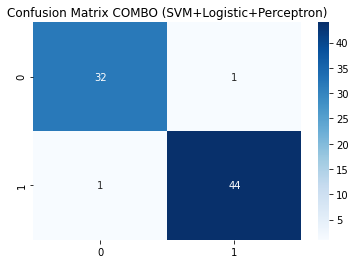

In [137]:
os.chdir(home_path)
cm_picture6=sn.heatmap(pd.DataFrame(cm_combo),cmap="Blues", annot=True)
figure6 = cm_picture6.get_figure()   
plt.title("Confusion Matrix COMBO (SVM+Logistic+Perceptron)")
figure6.savefig('/content/drive/My Drive/project/CGR_data/Confusion_combo.jpg', dpi=400)

In [138]:
# calculating the mean R^2 for a set of predictions:
results_combo = model_selection.cross_val_score(combo, X_train, y_train,cv=None)*100
results_combo

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sci

array([ 96.82539683, 100.        , 100.        ,  96.77419355,
        96.77419355])

In [139]:
acc_cross_validation['Combination']=results_svm
acc_cross_validation

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
0,85.714286,96.825397,66.666667,96.825397,100.000000,100.000000
1,93.650794,100.000000,69.841270,100.000000,100.000000,100.000000
2,83.870968,100.000000,70.967742,100.000000,100.000000,100.000000
3,85.483871,96.774194,67.741935,98.387097,96.774194,96.774194
4,91.935484,96.774194,74.193548,96.774194,96.774194,96.774194


In [140]:
df_result['Combination']=pd.Series({'Accuracy':accu_combo,'Cross_Validation':results_combo,'Confusion_Matrix':cm_combo,'Sensitivity':TPR_combo,'Specificity':TNR_combo,'Precision':percision_combo})
df_result

,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
Accuracy,89.7436,96.1538,79.4872,98.7179,96.1538,97.4359
Specificity,89.3617,97.7273,100,97.8261,95.6522,97.7778
Precision,84.8485,96.9697,100,96.9697,93.9394,94.1176
Sensitivity,90.3226,94.1176,67.3469,100,96.875,96.9697


,NaiveBayes,logistic regression,KNN,Perceptron,SVM,Combination
first fold,85.714286,96.825397,66.666667,96.825397,100.000000,100.000000
second fold,93.650794,100.000000,69.841270,100.000000,100.000000,100.000000
third fold,83.870968,100.000000,70.967742,100.000000,100.000000,100.000000
fourth fold,85.483871,96.774194,67.741935,98.387097,96.774194,96.774194
fifth fold,91.935484,96.774194,74.193548,96.774194,96.774194,96.774194


Text(0.5, 1.0, 'Cross Validatio summary for data without FS')

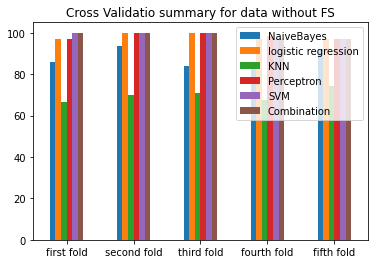

In [148]:
# bar plot of cross validation for each Models
index=['first fold', 'second fold', 'third fold', 'fourth fold', 'fifth fold']
df_cross=acc_cross_validation.copy()
df_cross.index=index
df_cross
axx = df_cross.plot.bar(rot=0)
figure7 = axx.get_figure()   
plt.title("Cross Validatio summary for data without FS")
figure7.savefig('/content/drive/My Drive/project/CGR_data/Cross_Validatio_summary_Without.jpg', dpi=400)

Text(0.5, 0.98, 'Model Comparison For data without FS')

{'boxes': [<matplotlib.lines.Line2D at 0x7fa0842669b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa084274400>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa084274e80>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa084274b00>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa084266cc0>,
  <matplotlib.lines.Line2D at 0x7fa0841c5ef0>]}

[Text(0, 0, 'NaiveBayes'),
 Text(0, 0, 'logistic regression'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'Perceptron'),
 Text(0, 0, 'SVM')]

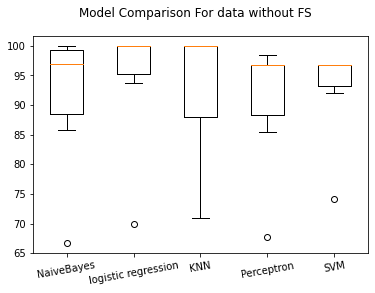

In [147]:
fig = plt.figure()
fig.suptitle('Model Comparison For data without FS')
ax = fig.add_subplot(111)
plt.boxplot(acc_cross_validation)
ax.set_xticklabels(df_resultcol,rotation=10)
plt.show()
fig.savefig('/content/drive/My Drive/project/CGR_data/Model_Comparison__WITHOUT.jpg', dpi=400)

Text(0.5, 1.0, 'Summary For withot FS')

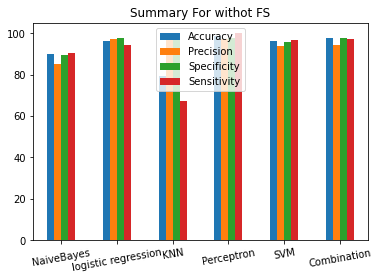

In [149]:
Accuracy=df_result.loc['Accuracy']
Sensitivity=df_result.loc['Sensitivity'] # Recall
Specificity=df_result.loc['Specificity']
Precision=df_result.loc['Precision']
index2=['NaiveBayes','logistic regression', 'KNN', 'Perceptron', 'SVM','Combination']
df2 = pd.DataFrame({'Accuracy': Accuracy,'Precision':Precision,'Specificity': Specificity,'Sensitivity': Sensitivity}, index=index2)
ax2 = df2.plot.bar(rot=10)
figure8 = ax2.get_figure()   
plt.title("Summary For withot FS")
figure8.savefig('/content/drive/My Drive/project/CGR_data/Summary_WITHOUT.jpg', dpi=400)

In [144]:
print('Duration: {} seconds'.format(time.time() - start))

Duration: 1342.0150032043457 seconds
